# 1. Visualising sample images and annotations 

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path
import os

In [2]:
plt.rcParams["savefig.bbox"] = 'tight'

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(num_images*5,num_images*5))
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [3]:
# loading annotations data
data = pd.read_csv("./BC_preprocessing/annotations.csv")
df = pd.DataFrame(data)
df.head()

,image,xmin,ymin,xmax,ymax,label
0,image-100.png,0.000000,0.000000,25.190198,40.816803,rbc
1,image-100.png,15.010502,0.000000,68.337223,23.527421,rbc
2,image-100.png,25.017503,16.021004,78.374562,73.735123,rbc
3,image-100.png,75.565928,1.061844,140.248541,45.591599,rbc
4,image-100.png,77.483081,23.290548,131.936989,74.806301,rbc


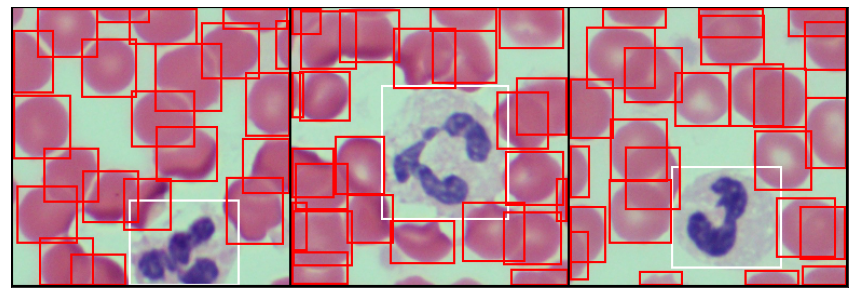

In [4]:
image_path = "./BC_preprocessing/images/"
file_list = []

# get a list of all the images in the file
for x in os.listdir(image_path):
    if x.endswith(".png"):
        file_list.append(x)

# Change num_images if you want to see more
num_images = 3
counter = 0
cell_dict = {}
anno_dict = {}

# showing the first (num_images) images
for file in file_list[:num_images]:
    counter +=1
    
    # update cell dictionary
    cell_dict[file] = read_image(image_path + file)
    
    # update annotations dictionary
    cell = df[df["image"]==file]
    cell_list = cell[["xmin", "ymin", "xmax", "ymax"]].values.tolist()
    cell_labels = cell["label"].values.tolist()
    cell_labels = ["red" if cell=="rbc" else "white" for cell in cell_labels]
    cell_list.append(cell_labels)
    
    anno_dict[file] = cell_list

from torchvision.utils import draw_bounding_boxes

result_dict = {}

# Visualising images and annotations
for i in range(num_images):
    boxes = torch.tensor(anno_dict[file_list[i]][:-1], dtype=torch.float)
    colors = anno_dict[file_list[i]][-1]
    result = draw_bounding_boxes(cell_dict[file_list[i]][:-1], boxes, colors=colors, width=2)
    result_dict[i] = result

grid = make_grid([result_dict[x] for x in result_dict])
show(grid)

# 2. Implementing YOLOv5

In [5]:
# Setup YOLOv5
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 10839, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 10839 (delta 1), reused 5 (delta 1), pack-reused 10834
Receiving objects: 100% (10839/10839), 10.87 MiB | 16.02 MiB/s, done.
Resolving deltas: 100% (7493/7493), done.
/Users/thesuperchee/Documents/YOLO/yolov5
Note: you may need to restart the kernel to use updated packages.


In [6]:
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.0-231-g9bc72a3 torch 1.10.2 CPU


Setup complete ✅ (8 CPUs, 32.0 GB RAM, 103.4/926.4 GB disk)


In [10]:
### Train YOLOv5 model
!python train.py --img 256 --batch 3 --epochs 100 --data "/Users/thesuperchee/Documents/YOLO/internship_assignment.yaml" --weights yolov5x.pt --cache

train: weights=yolov5x.pt, cfg=, data=/Users/thesuperchee/Documents/YOLO/internship_assignment.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=3, imgsz=256, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-231-g9bc72a3 torch 1.10.2 CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, transla

      0/99        0G    0.1209    0.1439   0.02834        94       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      0/99        0G    0.1212    0.1507   0.02832       151       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      0/99        0G    0.1209    0.1441   0.02816        61       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

      1/99        0G    0.1173    0.1482   0.02716        48       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      1/99        0G    0.1172    0.1545   0.02721       125       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      1/99        0G     0.117    0.1506   0.02713        76       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

      2/99        0G    0.1134    0.1715   0.02629       118       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      2/99        0G    0.1135    0.1788   0.02631       122       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      2/99        0G    0.1142    0.1958    0.0264       185       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

      3/99        0G    0.1092    0.1973   0.02556        99       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      3/99        0G    0.1084    0.1867   0.02554        91       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      3/99        0G    0.1099    0.2136    0.0256       177       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463     0.0592      0.408     0.0499    0.00967

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      4/99        0G    0.1033     0.218   0.02436       116       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      4/99        0G    0.10

      4/99        0G     0.102     0.183   0.02324       116       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      4/99        0G    0.1017    0.1803   0.02321        62       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      4/99        0G    0.1015    0.1788   0.02318        24       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463     0.0861      0.255     0.0704     0.0162

     Epoch   gpu_m

      5/99        0G    0.0996    0.1827    0.0219        69       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      5/99        0G   0.09929    0.1809   0.02183        79       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      5/99        0G   0.09901    0.1792   0.02181        81       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

      6/99        0G   0.09437    0.1488   0.02041       111       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      6/99        0G   0.09464    0.1504    0.0204       133       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      6/99        0G   0.09446    0.1501   0.02037        92       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

      7/99        0G   0.09173    0.1532   0.01882        75       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      7/99        0G   0.09178     0.154   0.01878       116       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      7/99        0G   0.09234    0.1574   0.01886       178       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

      8/99        0G    0.0913    0.1502   0.01763       139       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      8/99        0G   0.09117      0.15   0.01764       125       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      8/99        0G   0.09058    0.1476   0.01756        67       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

      9/99        0G    0.0881    0.1573   0.01627       110       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      9/99        0G    0.0874    0.1548    0.0161        87       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      9/99        0G   0.08717     0.155   0.01604       122       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     10/99        0G    0.0791     0.131   0.01422        95       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     10/99        0G   0.07895    0.1306   0.01428        99       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     10/99        0G   0.07951    0.1322   0.01429       123       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     11/99        0G   0.07779    0.1398   0.01341        96       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     11/99        0G   0.07772     0.138   0.01341       103       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     11/99        0G   0.07684    0.1351   0.01331        76       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     12/99        0G    0.0719    0.1316   0.01227       110       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     12/99        0G   0.07345    0.1367   0.01222       144       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     12/99        0G   0.07396    0.1376   0.01235       133       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     13/99        0G   0.07083    0.1226    0.0104        50       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     13/99        0G   0.06856    0.1176   0.01026        69       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     13/99        0G   0.06951    0.1231   0.01089       134       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     14/99        0G   0.06745    0.1256   0.01028        99       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     14/99        0G   0.06908    0.1226   0.01055       105       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     14/99        0G    0.0708    0.1281   0.01121       134       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.725       0.26      0.233     0.0666

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     15/99        0G   0.06495   0.09188    0.0117        66       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     15/99        0G   0.064

     15/99        0G   0.07165    0.1227  0.009463       165       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     15/99        0G   0.07114    0.1217  0.009379        68       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     15/99        0G   0.07182    0.1246  0.009414        54       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.222       0.31      0.264     0.0591

     Epoch   gpu_m

     16/99        0G   0.06668    0.1245   0.00837       123       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     16/99        0G   0.06725    0.1243  0.008412       103       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     16/99        0G   0.06784    0.1253  0.008447       131       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     17/99        0G   0.07057    0.1294  0.008566        60       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     17/99        0G   0.07093    0.1312   0.00864       152       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     17/99        0G   0.07115    0.1317  0.008672       129       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     18/99        0G   0.06589    0.1353  0.008502       144       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     18/99        0G    0.0666    0.1345  0.008491       100       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     18/99        0G   0.06747     0.137  0.008516       163       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     19/99        0G   0.08174    0.1314  0.007813       104       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     19/99        0G   0.08104    0.1314  0.007839       107       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     19/99        0G    0.0803    0.1316  0.007803       107       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     20/99        0G   0.06915    0.1248  0.008006       109       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     20/99        0G   0.06855    0.1232  0.007951        70       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     20/99        0G   0.06811    0.1211  0.007737        70       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     21/99        0G   0.07011    0.1073  0.006634        92       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     21/99        0G   0.06956    0.1101  0.006617       117       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     21/99        0G   0.06847     0.109  0.006593        74       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     22/99        0G   0.06721     0.112  0.006999        88       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     22/99        0G   0.06692    0.1161  0.006793       130       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     22/99        0G   0.06635    0.1145  0.006799        89       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     23/99        0G   0.08087    0.1147  0.006412       117       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     23/99        0G   0.08086    0.1173   0.00649       122       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     23/99        0G   0.07805    0.1145  0.006659        77       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     24/99        0G   0.09183    0.1161  0.006263       153       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     24/99        0G   0.09165    0.1204  0.006401       148       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     24/99        0G   0.09235    0.1258  0.006406       150       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     25/99        0G   0.08655    0.1138  0.007755       107       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     25/99        0G   0.08621    0.1078   0.00699        88       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     25/99        0G   0.08556     0.102  0.006813        63       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.343      0.635      0.325     0.0739

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     26/99        0G   0.07334    0.1132  0.008422        99       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     26/99        0G   0.073

     26/99        0G   0.07524    0.1041  0.005645        68       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     26/99        0G   0.07524    0.1031  0.005575        67       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     26/99        0G   0.07472    0.1019  0.005561        14       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.446      0.648      0.445      0.212

     Epoch   gpu_m

     27/99        0G   0.07494    0.1138    0.0054       129       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     27/99        0G   0.07539    0.1135  0.005398        95       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     27/99        0G    0.0757    0.1141  0.005356       116       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     28/99        0G   0.07729    0.1221  0.005451       115       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     28/99        0G   0.07747    0.1237  0.005465       161       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     28/99        0G   0.07669    0.1217  0.005408        70       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     29/99        0G   0.07171    0.1118  0.005432        85       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     29/99        0G   0.07156    0.1095  0.005382        53       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     29/99        0G   0.07147    0.1117   0.00534       136       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     30/99        0G   0.06591    0.1275   0.00518        98       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     30/99        0G   0.06599    0.1296  0.005244       153       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     30/99        0G    0.0655    0.1279  0.005191        84       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     31/99        0G    0.0652     0.121  0.004913        67       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     31/99        0G   0.06472    0.1194  0.005029        74       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     31/99        0G   0.06444    0.1173  0.005106        63       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     32/99        0G   0.07326    0.1143  0.004882       137       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     32/99        0G   0.07212    0.1123  0.004927        77       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     32/99        0G    0.0717    0.1116  0.004948       103       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     33/99        0G   0.06622    0.1109  0.004997       123       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     33/99        0G   0.06733    0.1173  0.005068       196       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     33/99        0G   0.06771    0.1163   0.00489       117       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     34/99        0G   0.07886    0.1138  0.004586       104       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     34/99        0G    0.0797    0.1178  0.004655       162       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     34/99        0G   0.07916    0.1167  0.004649        94       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     35/99        0G    0.0734    0.1074   0.00526        79       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     35/99        0G   0.07482    0.1127  0.005258       142       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     35/99        0G   0.07264    0.1075  0.005052        67       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     36/99        0G   0.06046   0.07665  0.004891        77       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     36/99        0G   0.05977   0.07729  0.004697        66       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     36/99        0G   0.05881   0.08152  0.004946        87       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.593      0.735      0.669      0.263

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     37/99        0G   0.08374    0.1175  0.003625       118       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     37/99        0G   0.082

     37/99        0G   0.08062    0.1088  0.003814        89       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     37/99        0G   0.08045    0.1085  0.003845        93       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     37/99        0G   0.08008     0.108  0.003878        25       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.559       0.63      0.583      0.167

     Epoch   gpu_m

     38/99        0G   0.07154    0.1051  0.004556        60       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     38/99        0G   0.07124     0.106  0.004535       117       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     38/99        0G   0.07121     0.108  0.004578       149       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     39/99        0G   0.06287    0.1228  0.004686        62       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     39/99        0G   0.06256    0.1223  0.004706        97       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     39/99        0G   0.06223    0.1213  0.004682        86       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     40/99        0G   0.05274    0.1075  0.003833        92       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     40/99        0G    0.0529    0.1073  0.003897       103       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     40/99        0G   0.05296     0.108  0.003904       116       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     41/99        0G   0.05192    0.1204  0.004435        81       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     41/99        0G   0.05162      0.12  0.004362        96       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     41/99        0G   0.05142    0.1198  0.004335        89       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     42/99        0G   0.06387    0.1098   0.00332       130       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     42/99        0G   0.06439    0.1119  0.003325       134       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     42/99        0G   0.06379    0.1107  0.003299        76       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     43/99        0G   0.08874    0.1201  0.003673       114       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     43/99        0G   0.08848    0.1204   0.00372       115       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     43/99        0G    0.0881    0.1187  0.003731        82       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     44/99        0G   0.06085    0.1063  0.004285        76       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     44/99        0G   0.06132    0.1091  0.004194       119       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     44/99        0G    0.0609    0.1084  0.004211        76       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     45/99        0G   0.05976    0.1122  0.004058        94       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     45/99        0G    0.0585    0.1106  0.004026        81       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     45/99        0G   0.05842     0.111  0.004045        96       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     46/99        0G   0.05683    0.1157  0.004367       118       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     46/99        0G    0.0563      0.11  0.004328        75       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     46/99        0G   0.05628    0.1086   0.00438        95       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     47/99        0G   0.04565   0.09482  0.003405        97       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     47/99        0G    0.0482    0.1051  0.003291       120       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     47/99        0G    0.0478    0.1048   0.00335        91       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.915      0.925      0.963       0.67

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     48/99        0G   0.04169    0.1044  0.003704        95       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     48/99        0G   0.055

     48/99        0G   0.04549    0.1069  0.003748       106       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     48/99        0G   0.04527    0.1066   0.00375        95       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     48/99        0G   0.04577     0.109  0.003822        63       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.816      0.692      0.842      0.418

     Epoch   gpu_m

     49/99        0G   0.06108    0.1128  0.003591       125       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     49/99        0G   0.06144    0.1143   0.00358       142       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     49/99        0G   0.06159    0.1139  0.003559        86       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     50/99        0G   0.06804    0.1153   0.00369       107       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     50/99        0G    0.0668    0.1125  0.003847        43       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     50/99        0G   0.06645    0.1131  0.003794       127       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     51/99        0G   0.05575    0.1043  0.003497       113       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     51/99        0G   0.05516    0.1035  0.003481        85       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     51/99        0G   0.05474    0.1041  0.003541       107       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     52/99        0G   0.04951     0.114  0.003603       139       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     52/99        0G   0.04962    0.1136  0.003667       116       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     52/99        0G   0.04983    0.1131  0.003785       122       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     53/99        0G    0.0467     0.101  0.003661        61       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     53/99        0G   0.04605    0.1002  0.003744        83       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     53/99        0G   0.04636    0.1031   0.00378       147       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     54/99        0G   0.04539    0.1039  0.003616       105       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     54/99        0G   0.04545    0.1036  0.003632       110       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     54/99        0G   0.04534    0.1032  0.003537       102       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     55/99        0G   0.04297    0.1074  0.003366        87       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     55/99        0G   0.04347    0.1098  0.003389       153       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     55/99        0G   0.04342     0.108  0.003318        87       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     56/99        0G   0.05621     0.128  0.003241       149       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     56/99        0G   0.05532    0.1248  0.003198       108       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     56/99        0G   0.05705    0.1281  0.003202       172       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     57/99        0G   0.06421    0.1097  0.002468        66       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     57/99        0G   0.06446    0.1082  0.002476        95       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     57/99        0G   0.06462      0.11  0.002663       115       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     58/99        0G   0.04026   0.08649  0.003902        68       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     58/99        0G   0.04232   0.08782  0.003357        96       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     58/99        0G   0.04152   0.08756  0.003335        80       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.896      0.895      0.934      0.605

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     59/99        0G   0.04281    0.1048  0.002477       106       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     59/99        0G   0.042

     59/99        0G   0.04216   0.09603  0.003273        65       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     59/99        0G   0.04212   0.09615  0.003222       108       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     59/99        0G   0.04214   0.09687    0.0033        37       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.936      0.954      0.977      0.701

     Epoch   gpu_m

     60/99        0G   0.04067   0.09854  0.003261        81       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     60/99        0G   0.04024   0.09749  0.003219        73       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     60/99        0G   0.04008   0.09711  0.003193        96       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     61/99        0G   0.03961   0.09614  0.003103       108       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     61/99        0G   0.03915   0.09471  0.003164        67       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     61/99        0G   0.03865   0.09363  0.003137        74       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     62/99        0G   0.03973   0.09983  0.002627       108       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     62/99        0G   0.04022     0.102  0.002611       152       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     62/99        0G      0.04    0.1013  0.002599        92       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     63/99        0G   0.04694    0.1072  0.002514        83       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     63/99        0G   0.04645     0.105  0.002536        54       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     63/99        0G   0.04678    0.1065  0.002598       151       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     64/99        0G   0.05873    0.1084  0.002539        64       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     64/99        0G   0.05875    0.1082   0.00256        94       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     64/99        0G   0.05892    0.1087  0.002623       115       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     65/99        0G   0.04729    0.1045  0.002553       113       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     65/99        0G   0.04739    0.1056  0.002542       115       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     65/99        0G   0.04711    0.1046  0.002556        93       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     66/99        0G   0.04562     0.099  0.002896        87       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     66/99        0G   0.04576    0.1005  0.002857       123       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     66/99        0G   0.04588    0.1008  0.002768       106       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     67/99        0G    0.0376    0.0857   0.00269       113       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     67/99        0G   0.03837   0.09093   0.00288       133       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     67/99        0G    0.0394   0.09359  0.002857       142       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     68/99        0G   0.03868   0.09506  0.002399       110       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     68/99        0G   0.03762   0.09349  0.002431        95       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     68/99        0G   0.03705   0.09324  0.002326        98       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     69/99        0G   0.03636   0.08898  0.002827       115       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     69/99        0G   0.03615   0.08553  0.002521        87       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     69/99        0G   0.03524   0.08311  0.002387        74       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463       0.78      0.943      0.833      0.563

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     70/99        0G   0.04525    0.1031  0.002627       125       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     70/99        0G   0.042

     70/99        0G   0.04104   0.09412  0.002364       100       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     70/99        0G   0.04142   0.09448   0.00234       103       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     70/99        0G   0.04177   0.09486  0.002304        31       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.798      0.868      0.852      0.494

     Epoch   gpu_m

     71/99        0G    0.0461    0.0955  0.002643        62       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     71/99        0G   0.04561   0.09442  0.002626        68       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     71/99        0G   0.04495   0.09286  0.002714        61       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     72/99        0G   0.04089   0.08951  0.002748        92       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     72/99        0G   0.04089   0.08986  0.002727       111       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     72/99        0G   0.04065   0.08981  0.002704        97       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     73/99        0G   0.03957    0.1001  0.003113       139       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     73/99        0G   0.03906   0.09855  0.003041        91       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     73/99        0G   0.03883   0.09829  0.003012        94       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     74/99        0G   0.03566   0.09204  0.002486        62       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     74/99        0G   0.03546   0.09072  0.002455        93       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     74/99        0G   0.03522   0.08958  0.002425        77       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     75/99        0G   0.03377   0.08061  0.002162        98       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     75/99        0G    0.0342   0.08167  0.002192       119       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     75/99        0G   0.03596   0.08735  0.002347       213       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     76/99        0G   0.03462   0.08599  0.002581       136       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     76/99        0G   0.03488   0.08704  0.002741       117       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     76/99        0G    0.0344   0.08594  0.002634        86       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     77/99        0G   0.03584   0.08528  0.002376        96       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     77/99        0G    0.0358   0.08368  0.002425        71       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     77/99        0G   0.03625   0.08563  0.002397       103       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     78/99        0G   0.05135    0.1092  0.002087       132       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     78/99        0G   0.05046    0.1089  0.002047       101       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     78/99        0G   0.05055    0.1092  0.002085       125       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     79/99        0G   0.03795     0.106  0.001999       167       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     79/99        0G   0.03754    0.1016  0.001997        92       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     79/99        0G   0.03862     0.103  0.002026       123       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     80/99        0G    0.0341   0.08094   0.00193       113       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     80/99        0G   0.03436   0.08064  0.001769        89       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     80/99        0G   0.03454   0.08151  0.001829        96       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.897      0.979      0.914      0.715

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     81/99        0G   0.04083    0.1049  0.002188       132       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     81/99        0G   0.034

     81/99        0G   0.03483   0.09013  0.002304        97       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     81/99        0G   0.03472   0.08996  0.002265       103       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     81/99        0G   0.03553   0.09286   0.00229        66       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463       0.91      0.967      0.914      0.708

     Epoch   gpu_m

     82/99        0G   0.03497   0.08722  0.002544       102       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     82/99        0G   0.03488   0.08715  0.002518       100       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     82/99        0G   0.03489   0.08728  0.002533       120       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     83/99        0G   0.03516   0.09038  0.002174        80       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     83/99        0G   0.03516   0.08945  0.002159        96       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     83/99        0G   0.03493   0.08903  0.002189       101       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     84/99        0G   0.03562   0.09274  0.002413        72       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     84/99        0G   0.03525   0.09133  0.002399        76       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     84/99        0G   0.03525   0.09115  0.002371        99       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     85/99        0G   0.03329   0.08383  0.002022        81       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     85/99        0G   0.03309   0.08317     0.002        79       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     85/99        0G   0.03263    0.0819  0.001977        56       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     86/99        0G   0.03268   0.08276  0.002379        69       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     86/99        0G   0.03298   0.08471  0.002369       123       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     86/99        0G   0.03268   0.08394  0.002326        85       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     87/99        0G    0.0357   0.09028  0.002445        96       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     87/99        0G    0.0353   0.08942  0.002343       102       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     87/99        0G   0.03472   0.08736  0.002281        72       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     88/99        0G   0.03568   0.09152  0.002528       148       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     88/99        0G   0.03466   0.08872  0.002475        63       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     88/99        0G   0.03587   0.09272  0.002521       161       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     89/99        0G   0.03332   0.08453  0.002045        92       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     89/99        0G   0.03341   0.08465  0.002032       111       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     89/99        0G   0.03356   0.08508  0.002012       115       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     90/99        0G   0.03342   0.08863  0.002425       133       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     90/99        0G   0.03282   0.08711  0.002261        84       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     90/99        0G   0.03164   0.08376  0.002124        67       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     91/99        0G   0.03874    0.1057  0.002482       159       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     91/99        0G   0.03742    0.1031  0.002267       104       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     91/99        0G   0.03739   0.09847  0.002149       112       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.896      0.957      0.905      0.707

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     92/99        0G   0.04554    0.1376  0.002433       170       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     92/99        0G   0.037

     92/99        0G   0.03576   0.09193  0.002267       105       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     92/99        0G   0.03614   0.09293  0.002267       159       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     92/99        0G   0.03664   0.09369  0.002432        50       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.861      0.967      0.899      0.698

     Epoch   gpu_m

     93/99        0G   0.03397    0.0857  0.002208       141       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     93/99        0G   0.03374    0.0852  0.002167        95       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     93/99        0G   0.03421   0.08602  0.002258       139       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     94/99        0G   0.03486   0.08866   0.00186        72       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     94/99        0G   0.03496   0.08824   0.00188       103       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     94/99        0G   0.03461   0.08731  0.001848        74       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     95/99        0G   0.03144   0.07617  0.001699        63       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     95/99        0G   0.03145   0.07665  0.001682       107       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     95/99        0G   0.03194    0.0776  0.001777       127       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     96/99        0G   0.03627   0.09475  0.002599       187       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     96/99        0G   0.03568   0.09269  0.002512        69       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     96/99        0G   0.03536   0.09267  0.002471       107       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     97/99        0G   0.03036   0.07745  0.002062        84       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     97/99        0G   0.03006   0.07621  0.002009        56       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     97/99        0G   0.02982   0.07499  0.001973        60       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     98/99        0G   0.03324   0.08308     0.002        97       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     98/99        0G   0.03359   0.08398  0.002149       136       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     98/99        0G    0.0335   0.08363  0.002061        91       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     99/99        0G   0.03239    0.0822  0.001778       111       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     99/99        0G    0.0315   0.08005  0.001719        81       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     99/99        0G   0.03155   0.08062  0.001793       109       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

In [15]:
# Implementing the model on the test set using the weights from the trained model
!python detect.py --weights runs/train/exp/weights/best.pt --img 256 --conf 0.7 --source "../BC/test/images"

detect: weights=['runs/train/exp/weights/best.pt'], source=../BC/test/images, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-231-g9bc72a3 torch 1.10.2 CPU

Fusing layers... 
Model Summary: 444 layers, 86180143 parameters, 0 gradients, 204.0 GFLOPs
image 1/10 /Users/thesuperchee/Documents/YOLO/BC/test/images/image-105_png.rf.8da07e2e162218fcce8953587d680e06.jpg: 256x256 16 rbcs, 1 wbc, Done. (0.125s)
image 2/10 /Users/thesuperchee/Documents/YOLO/BC/test/images/image-106_png.rf.0cc55b568335923e573a2b7f363638aa.jpg: 256x256 19 rbcs, 1 wbc, Done. (0.133s)
image 3/10 /Users/thesuperchee/Documents/YOLO/BC/test/images/image-110_png.rf.aa0e26a7510f01562

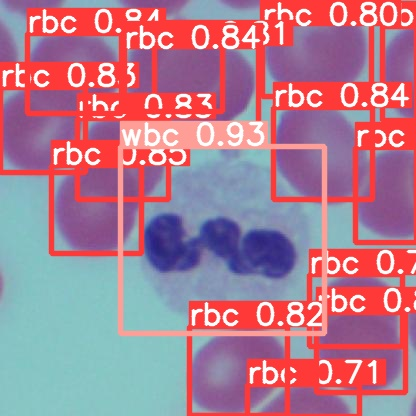

In [16]:
display.Image(filename='/Users/thesuperchee/Documents/YOLO/yolov5/runs/detect/exp3/image-31_png.rf.f70db72fb0f995b3dd5a4bc3d5a5c67d.jpg', width=300)